# The Fibonacci Sequence

## The Problem 

The Fibonacci sequence, denoted $F_{n}$, is the sequence in which the $n^{th}$ number is the sum of the two numbers before it. More formally, we have: 

$F_{0}=0, F_{1}=1$, and $F_{n}=F_{n-1}+𝐹_{n-2}$

for all $n >1$.

This project will examine some of the different algorithms used to find the $n^{th}$ number of this sequence. The input to the algorithms will be a positive integer $n$, and the output will be the $n^{th}$ Fibonacci number.

The ratio between two consecutive terms of the Fibonacci sequence converges to approximately $1.618$, known as the Golden Ratio.

## Real-World Applications 

The Fibonacci sequence can be found in several natural phenomena, including:

1. The rabbit breeding Experiment
    1. One male, one female rabbit in a field
    1. Rabbits are assumed to have infinite lifespan
    1. One male, one female produced every month
    1. Number of rabbits produced in a year perfectly follows Fibonacci sequence=144
1. Flower petals
    1. 1 petal: white cally lily
    1. 3 petals: lily, iris
    1. 5 petals: buttercup, wild rose, larkspur, columbine (aquilegia)
    1. 8 petals: delphiniums
    1. 13 petals: ragwort, corn marigold, cineraria,
    1. 21 petals: aster, black-eyed susan, chicory
    1. 34 petals: plantain, pyrethrum
    1. 55, 89 petals: michaelmas daisies, the asteraceae family
1. Flower seed spirals
1. Fibonacci spiral
    1. Snails
    1. Sea shells
    1. roses
1. Human hands
    1. Two
    1. Five Fingers
    1. Three parts
    1. Two knuckles
1. Music
    1. Octaves
    1. Golden ratio used for musical instruments

It is evident from this list that the Fibonacci sequence was likely created to mathematically explain certain natural occurrences.

## The Algorithms

We will examine three algorithms:

1. Brute force (recursive approach)
2. Dynamic programming (memoization)
3. Fast doubling

### Brute Force (Recursion)

This approach is the simplest to implement, with recursive calls to the Fibonacci function using the recurrence from the problem description. A recursive function is shown below:

In [1]:
#imports

import numpy as np
import time 
import matplotlib.pyplot as plt

In [2]:
def fibonacci_recursion(n):
    if n<=1:
        return n
    else:
        return fibonacci_recursion(n-1)+fibonacci_recursion(n-2)

The disadvantage to this approach is that as n gets larger, the algorithm will do many repetitive recursive calls. This leads to an exponential worst-case running time of $O(\varphi^{n})$, where:

$$\varphi=\frac{\sqrt{5}+1}{2}$$

Hence, this is an extremely slow approach.

### Dynamic Programming (Memoization)

This uses a technique called memoization, where we save the previous two results in a data structure to avoid repeated work. A memoization function is shown below:

In [3]:
def fibonacci_memoization(n):
    fib_cache=[]

    if n<=1:
        return n

    else: 
        fib_cache.append(1)
        fib_cache.append(1)
        for i in range (2, n):
            fib_cache.append(fib_cache[i-1]+fib_cache[i-2])
        return fib_cache[n-1]

This algorithm only requires a linear traversal of an array and no recursive calls, and thus has a worst-case running time of $O(n)$.

### Fast Doubling

Fast doubling is one of the best Fibonacci algorithms. It involves calculating the following identities given $F(k)$ and $F(k+1)$:

$$F(2k)=F(k)(2F(k+1)-F(k))$$

$$F(2k+1)=F(k+1)^{2}+F(k)^{2}$$

These identities are derived from a matrix exponentiation implementation of this problem. A fast doubling function is given below:

In [4]:
def fibonacci_fast_doubling(n):
    if n==0:
        return (0, 1)
    else:
        [a, b]=fibonacci_fast_doubling(n//2)
        c=a*(b*2-a)
        d=a*a+b*b
        if n%2==0:
            return (c, d)
        else:
            return (d, c+d)

This algorithm has a worst case running time of $O(log n)$.

## Methods

We will perform two separate comparisons to validate the claims above. The first comparison will examine the running time of recursion against the running time of memoization. For this, the algorithms will be asked asked to compute the $n^{th}$ Fibonacci number, where n iterates from 1 to 40. This computation will be performed 5 separate times for each input, with the average of the 5 runtimes being used as the empirical result. A small upper bound for n such as 40 was necessary to reduce the total runtime of the recursive implementation. For the implementation of memoization, we will use a dictionary. This is a data structure akin to an array.

The second comparison will examineexamine the running time of memoization against the running time of fast doubling. For this, the algorithms will be asked to compute the $n^{th}$ Fibonacci number, where n is increased in increments of 5000 from 5000 to 250,000. This computation is performed 5 separate times for each input, with the average of the 5 runtimes being used as the empirical result. For the implementation of memoization, we will use a dictionary. This is a data structure akin to an array.

## Results

A plot of the first experiment described above is shown below:

In [5]:
recur_averages=[]
memo_averages=[]

for i in range (1, 41):
    recur_sum=0
    memo_sum=0
    for j in range(1, 6):
        recur_start=time.perf_counter()
        fibonacci_recursion(i)
        recur_end=time.perf_counter()
        recur_run=(recur_end-recur_start)            
        recur_sum+=recur_run 
        memo_start=time.perf_counter()
        fibonacci_memoization(i)
        memo_end=time.perf_counter()
        memo_run=(memo_end-memo_start)            
        memo_sum+=memo_run
    recur_average=recur_sum/5
    memo_average=memo_sum/5
    recur_averages.append(recur_average)
    memo_averages.append(memo_average)

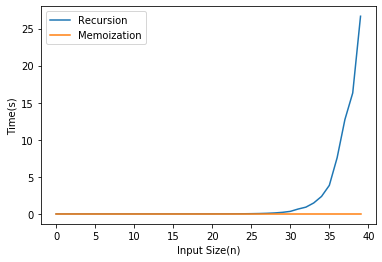

In [6]:
plt.plot(recur_averages, label='Recursion')
plt.plot(memo_averages, label='Memoization')
plt.xlabel('Input Size(n)')
plt.ylabel('Time(s)')
plt.legend()
plt.show()

From this graph, it is evident that there is a significant difference between the running times of recursion and the running times of memoization. This difference is so significant that the line representing empirical runtime values for memoization appears flat. This is to be expected, and is consistent with theoretical results. We now consider the second comparison.

In [7]:
memo_averages=[]
doubling_averages=[]

for i in range (1, 51):
    n=5000*i
    memo_sum=0
    doubling_sum=0
    for j in range(1, 6):
        memo_start=time.perf_counter()
        fibonacci_memoization(n)
        memo_end=time.perf_counter()
        memo_run=(memo_end-memo_start)            
        memo_sum+=memo_run
        doubling_start=time.perf_counter()
        fibonacci_fast_doubling(n)
        doubling_end=time.perf_counter()
        doubling_run=(doubling_end-doubling_start)            
        doubling_sum+=doubling_run
    memo_average=memo_sum/5
    doubling_average=doubling_sum/5
    memo_averages.append(memo_average)
    doubling_averages.append(doubling_average)

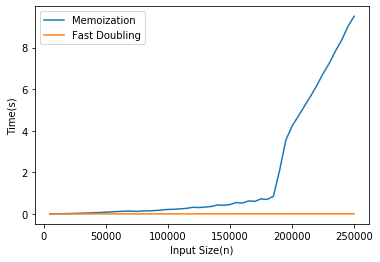

In [11]:
input_sizes=[5000*i for i in range(1, 51)]

plt.plot(input_sizes, memo_averages, label='Memoization')
plt.plot(input_sizes, doubling_averages, label='Fast Doubling')
plt.xlabel('Input Size(n)')
plt.ylabel('Time(s)')
plt.legend()
plt.show()

From this graph, it is clear that Python is doing some background operations to increase the running time as the input size gets larger past 150,000. This is why it eventually diverges from the theoretical running time. However, the running time for this algorithm is significantly slower than that of fast doubling, slow enough that the graph for fast doubling appears flat. This indicates that it is the best algorithm out of the three examined to solve this problem, and is consistent with theoretical results.

## Conclusions

The results of these experiments demonstrate that fast doubling is the best overall option out of the three for solving the Fibonacci problem. It is significantly faster than memoization, which in turn is significantly faster than recursion. However, a comparison of the empirical and theoretical results reveals that a certain amount of additional running time should be expected depending on the language used as well as the compiler. This is because of the "hidden constant C" in algorithmic complexity theory, representing the background operations done by the interpreter that increase the running time past that of the theoretical running time.

## References 

1. Applications: http://www.ijesi.org/papers/Vol(6)9/Version-3/B0609030714.pdf
2. Algorithms w/Running times: https://www.nayuki.io/page/fast-fibonacci-algorithms